In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import warnings
warnings.filterwarnings('ignore')

# Input Variables

In [2]:
Ticker = "MSFT"
Start_Prediction = "2018-01-05"
Prediction_Date = "2018-01-12"

Start_Learning = "2016-01-04"
End_Learning = "2018-01-04"


End_Prediction = Prediction_Date

In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in c:\programdata\anaconda3\lib\site-packages (from requests>=2.19.0->pandas_datareader) (1.25.11)



In [4]:
from pandas_datareader import data as pdr

df1 = pdr.get_data_yahoo([Ticker], 
                         start= Start_Learning,
                         end= End_Learning)

In [5]:
df1

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2016-01-04,50.006744,54.799999,54.799999,53.389999,54.320000,53778000.0
2016-01-05,50.234879,55.049999,55.389999,54.540001,54.930000,34079700.0
2016-01-06,49.322346,54.049999,54.400002,53.639999,54.320000,39518900.0
2016-01-07,47.606789,52.169998,53.490002,52.070000,52.700001,56564900.0
2016-01-08,47.752792,52.330002,53.279999,52.150002,52.369999,48754000.0
...,...,...,...,...,...,...
2017-12-28,82.163185,85.720001,85.930000,85.550003,85.900002,10594300.0
2017-12-29,81.990669,85.540001,86.050003,85.500000,85.629997,18717400.0


In [6]:
daily_prices1 = pd.concat([df1['Open'], df1['High'], df1['Low'],
                           df1['Adj Close'], df1['Volume'],df1['Close']], axis=1)

daily_prices1.columns = ['Open', 'High', 'Low',
                         'Adj Close','Volume','Close']

In [7]:
daily_prices1.head()

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,50.006744,53778000.0,54.799999
2016-01-05,54.930000,55.389999,54.540001,50.234879,34079700.0,55.049999
2016-01-06,54.320000,54.400002,53.639999,49.322346,39518900.0,54.049999
2016-01-07,52.700001,53.490002,52.070000,47.606789,56564900.0,52.169998
2016-01-08,52.369999,53.279999,52.150002,47.752792,48754000.0,52.330002


In [8]:
daily_prices1.tail()

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2017-12-28,85.900002,85.930000,85.550003,82.163185,10594300.0,85.720001
2017-12-29,85.629997,86.050003,85.500000,81.990669,18717400.0,85.540001
2018-01-02,86.129997,86.309998,85.500000,82.383636,22483800.0,85.949997
2018-01-03,86.059998,86.510002,85.970001,82.767044,26061400.0,86.349998
2018-01-04,86.589996,87.660004,86.570000,83.495522,21912000.0,87.110001


In [9]:
daily_prices1['Close t+1'] = 0.001

for i in range (len(daily_prices1['Close'])):
    daily_prices1['Close t+1'][i-1]=float(daily_prices1['Close'][i])
    
daily_prices1['Close t+2'] = 0.001

for i in range (len(daily_prices1['Close'])):
    daily_prices1['Close t+2'][i-2]=float(daily_prices1['Close'][i])
    
daily_prices1['Close t+3'] = 0.001

for i in range (len(daily_prices1['Close'])):
    daily_prices1['Close t+3'][i-3]=float(daily_prices1['Close'][i])
    
daily_prices1['Close t+4'] = 0.001

for i in range (len(daily_prices1['Close'])):
    daily_prices1['Close t+4'][i-4]=float(daily_prices1['Close'][i])
    
daily_prices1['Close t+5'] = 0.001

for i in range (len(daily_prices1['Close'])):
    daily_prices1['Close t+5'][i-5]=float(daily_prices1['Close'][i])
    
data1 = daily_prices1[daily_prices1.index != End_Learning]
data1.head()

,Open,High,Low,Adj Close,Volume,Close,Close t+1,Close t+2,Close t+3,Close t+4,Close t+5
Date,,,,,,,,,,,
2016-01-04,54.320000,54.799999,53.389999,50.006744,53778000.0,54.799999,55.049999,54.049999,52.169998,52.330002,52.299999
2016-01-05,54.930000,55.389999,54.540001,50.234879,34079700.0,55.049999,54.049999,52.169998,52.330002,52.299999,52.779999
2016-01-06,54.320000,54.400002,53.639999,49.322346,39518900.0,54.049999,52.169998,52.330002,52.299999,52.779999,51.639999
2016-01-07,52.700001,53.490002,52.070000,47.606789,56564900.0,52.169998,52.330002,52.299999,52.779999,51.639999,53.110001
2016-01-08,52.369999,53.279999,52.150002,47.752792,48754000.0,52.330002,52.299999,52.779999,51.639999,53.110001,50.990002


In [10]:
data1.tail()

,Open,High,Low,Adj Close,Volume,Close,Close t+1,Close t+2,Close t+3,Close t+4,Close t+5
Date,,,,,,,,,,,
2017-12-27,85.650002,85.980003,85.220001,82.153587,14678000.0,85.709999,85.720001,85.540001,85.949997,86.349998,87.110001
2017-12-28,85.900002,85.930000,85.550003,82.163185,10594300.0,85.720001,85.540001,85.949997,86.349998,87.110001,54.799999
2017-12-29,85.629997,86.050003,85.500000,81.990669,18717400.0,85.540001,85.949997,86.349998,87.110001,54.799999,55.049999
2018-01-02,86.129997,86.309998,85.500000,82.383636,22483800.0,85.949997,86.349998,87.110001,54.799999,55.049999,54.049999
2018-01-03,86.059998,86.510002,85.970001,82.767044,26061400.0,86.349998,87.110001,54.799999,55.049999,54.049999,52.169998


In [11]:
X1 = data1[['Open', 'High', 'Low','Adj Close','Volume','Close']]
y1 = data1[['Close t+1']]
X2 = data1[['Open', 'High', 'Low','Adj Close','Volume','Close']]
y2 = data1[['Close t+2']]
X3 = data1[['Open', 'High', 'Low','Adj Close','Volume','Close']]
y3 = data1[['Close t+3']]
X4 = data1[['Open', 'High', 'Low','Adj Close','Volume','Close']]
y4 = data1[['Close t+4']]
X5 = data1[['Open', 'High', 'Low','Adj Close','Volume','Close']]
y5 = data1[['Close t+5']]

# Train and Build a Linear Regression Model

## First Model

In [12]:
import statsmodels.api as sm
# Add a constant to the independent value
X_1 = sm.add_constant(X1)
# make regression model 
model = sm.OLS(y1, X_1)
# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close t+1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:01:51   Log-Likelihood:                -544.13
No. Observations:                 505   AIC:                             1102.
Df Residuals:                     498   BIC:                             1132.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5840      0.766      3.374      0.0

In [13]:
import statsmodels.api as sm
# Add a constant to the independent value
X_2 = sm.add_constant(X2)
# make regression model 
model = sm.OLS(y2, X_2)
# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close t+2   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2944.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:01:51   Log-Likelihood:                -981.57
No. Observations:                 505   AIC:                             1977.
Df Residuals:                     498   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0360      1.821      3.863      0.0

In [14]:
import statsmodels.api as sm
# Add a constant to the independent value
X_3 = sm.add_constant(X3)
# make regression model 
model = sm.OLS(y3, X_3)
# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close t+3   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1632.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          9.88e-324
Time:                        22:01:51   Log-Likelihood:                -1124.9
No. Observations:                 505   AIC:                             2264.
Df Residuals:                     498   BIC:                             2293.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0887      2.419      4.584      0.0

In [15]:
import statsmodels.api as sm
# Add a constant to the independent value
X_4 = sm.add_constant(X4)
# make regression model 
model = sm.OLS(y4, X_4)
# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close t+4   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          7.41e-285
Time:                        22:01:51   Log-Likelihood:                -1215.6
No. Observations:                 505   AIC:                             2445.
Df Residuals:                     498   BIC:                             2475.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0653      2.895      5.204      0.0

In [16]:
import statsmodels.api as sm
# Add a constant to the independent value
X_5 = sm.add_constant(X5)
# make regression model 
model = sm.OLS(y5, X_5)
# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Close t+5   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     820.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.63e-254
Time:                        22:01:51   Log-Likelihood:                -1286.5
No. Observations:                 505   AIC:                             2587.
Df Residuals:                     498   BIC:                             2617.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0651      3.331      5.723      0.0

In [17]:
lr_1 = LinearRegression()
lr_2 = LinearRegression()
lr_3 = LinearRegression()
lr_4 = LinearRegression()
lr_5 = LinearRegression()
#fit the linear model on train data
lr_model_1 = lr_1.fit(X1,y1)  
lr_model_2 = lr_2.fit(X2,y2) 
lr_model_3 = lr_3.fit(X3,y3) 
lr_model_4 = lr_4.fit(X4,y4) 
lr_model_5 = lr_5.fit(X5,y5)  

# Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#predict using the model
y_pred_1 = lr_1.predict(X1)  
y_pred_2 = lr_2.predict(X2)  
y_pred_3 = lr_3.predict(X3)  
y_pred_4 = lr_4.predict(X4)  
y_pred_5 = lr_5.predict(X5)  
#calculate R squared
print("R squared of linear regression model 1:", "{:.2%}".format(lr_model_1.score(X1, y1)))
print("R squared of linear regression model 2:", "{:.2%}".format(lr_model_2.score(X2, y2)))
print("R squared of linear regression model 3:", "{:.2%}".format(lr_model_3.score(X3, y3)))
print("R squared of linear regression model 4:", "{:.2%}".format(lr_model_4.score(X4, y4)))
print("R squared of linear regression model 5:", "{:.2%}".format(lr_model_5.score(X5, y5)))
#calculate rmse
rmse_1 = np.sqrt(mean_squared_error(y1,y_pred_1)) 
rmse_2 = np.sqrt(mean_squared_error(y2,y_pred_2)) 
rmse_3 = np.sqrt(mean_squared_error(y3,y_pred_3)) 
rmse_4 = np.sqrt(mean_squared_error(y4,y_pred_4)) 
rmse_5 = np.sqrt(mean_squared_error(y5,y_pred_5)) 
print('RMSE of linear regression model 1:',rmse_1)
print('RMSE of linear regression model 2:',rmse_2)
print('RMSE of linear regression model 3:',rmse_3)
print('RMSE of linear regression model 4:',rmse_4)
print('RMSE of linear regression model 5:',rmse_5)

R squared of linear regression model 1: 99.52%
R squared of linear regression model 2: 97.26%
R squared of linear regression model 3: 95.16%
R squared of linear regression model 4: 93.06%
R squared of linear regression model 5: 90.82%
RMSE of linear regression model 1: 0.7107384917578692
RMSE of linear regression model 2: 1.6900724676191439
RMSE of linear regression model 3: 2.2448463328787014
RMSE of linear regression model 4: 2.686417393040567
RMSE of linear regression model 5: 3.091434499804645


# Real-time Prediction

In [19]:
df2 = pdr.get_data_yahoo(["MSFT"], start= Start_Prediction, end= End_Prediction)

In [20]:
df2

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2018-01-05,84.530701,88.190002,88.410004,87.430000,87.660004,23407100
2018-01-08,84.616966,88.279999,88.580002,87.599998,88.199997,22113000
2018-01-09,84.559456,88.220001,88.730003,87.860001,88.650002,19484300
2018-01-10,84.176056,87.820000,88.190002,87.410004,87.860001,18652200
2018-01-11,84.425262,88.080002,88.129997,87.239998,88.129997,17808900
2018-01-12,85.882187,89.599998,89.779999,88.449997,88.669998,24271500


In [21]:
daily_prices2 = pd.concat([df2['Open'], df2['High'], df2['Low'],
                           df2['Adj Close'], df2['Volume'],df2['Close']], axis=1)
daily_prices2.columns = ['Open', 'High', 'Low',
                         'Adj Close','Volume','Close']
daily_prices2.head()

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2018-01-05,87.660004,88.410004,87.430000,84.530701,23407100,88.190002
2018-01-08,88.199997,88.580002,87.599998,84.616966,22113000,88.279999
2018-01-09,88.650002,88.730003,87.860001,84.559456,19484300,88.220001
2018-01-10,87.860001,88.190002,87.410004,84.176056,18652200,87.820000
2018-01-11,88.129997,88.129997,87.239998,84.425262,17808900,88.080002


In [22]:
daily_prices2.tail()

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2018-01-08,88.199997,88.580002,87.599998,84.616966,22113000,88.279999
2018-01-09,88.650002,88.730003,87.860001,84.559456,19484300,88.220001
2018-01-10,87.860001,88.190002,87.410004,84.176056,18652200,87.820000
2018-01-11,88.129997,88.129997,87.239998,84.425262,17808900,88.080002
2018-01-12,88.669998,89.779999,88.449997,85.882187,24271500,89.599998


In [23]:
daily_prices2['Close t+1'] = 0.001

for i in range (len(daily_prices2['Close'])):
    daily_prices2['Close t+1'][i-1]=float(daily_prices2['Close'][i])
    
daily_prices2['Close t+2'] = 0.001

for i in range (len(daily_prices2['Close'])):
    daily_prices2['Close t+2'][i-2]=float(daily_prices2['Close'][i])
    
daily_prices2['Close t+3'] = 0.001

for i in range (len(daily_prices2['Close'])):
    daily_prices2['Close t+3'][i-3]=float(daily_prices2['Close'][i])
    
daily_prices2['Close t+4'] = 0.001

for i in range (len(daily_prices2['Close'])):
    daily_prices2['Close t+4'][i-4]=float(daily_prices2['Close'][i])

daily_prices2['Close t+5'] = 0.001

for i in range (len(daily_prices2['Close'])):
    daily_prices2['Close t+5'][i-5]=float(daily_prices2['Close'][i])
    
daily_prices2
data2 = daily_prices2[daily_prices2.index == Start_Prediction]
data2

,Open,High,Low,Adj Close,Volume,Close,Close t+1,Close t+2,Close t+3,Close t+4,Close t+5
Date,,,,,,,,,,,
2018-01-05,87.660004,88.410004,87.43,84.530701,23407100,88.190002,88.279999,88.220001,87.82,88.080002,89.599998


In [24]:
daily_prices2.index

DatetimeIndex(['2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [25]:
Date_1 = daily_prices2.index[-5]
Date_2 = daily_prices2.index[-4]
Date_3 = daily_prices2.index[-3]
Date_4 = daily_prices2.index[-2]
Date_5 = daily_prices2.index[-1]

In [26]:
TRUE_1 = data2['Close t+1'][0]
TRUE_2 = data2['Close t+2'][0]
TRUE_3 = data2['Close t+3'][0]
TRUE_4 = data2['Close t+4'][0]
TRUE_5 = data2['Close t+5'][0]

In [27]:
new_data = data2.drop(['Close t+1','Close t+2','Close t+3','Close t+4','Close t+5',], axis=1)
new_data 

,Open,High,Low,Adj Close,Volume,Close
Date,,,,,,
2018-01-05,87.660004,88.410004,87.43,84.530701,23407100,88.190002


In [28]:
new_data = np.array(new_data).reshape(1, -1)
new_pred_1 = lr_1.predict(new_data)
new_pred_2 = lr_2.predict(new_data)
new_pred_3 = lr_3.predict(new_data)
new_pred_4 = lr_4.predict(new_data)
new_pred_5 = lr_5.predict(new_data)
result_1 = float(new_pred_1[0])
result_2 = float(new_pred_2[0])
result_3 = float(new_pred_3[0])
result_4 = float(new_pred_4[0])
result_5 = float(new_pred_5[0])

In [29]:
r1 = pd.DataFrame({'Date':[Date_1,Date_2,Date_3,Date_4,Date_5],'True':[TRUE_1,TRUE_2,TRUE_3,TRUE_4,TRUE_5],'Predicted':[result_1,result_2,result_3,result_4,result_5]})
r1['diff'] = r1['Predicted']-r1['True']
r1['error'] = r1['Predicted']/r1['True']-1
r1['error1'] = r1['error']
r1['error1'][0] = "{:.2%}".format(r1['error'][0])
r1['error1'][1] = "{:.2%}".format(r1['error'][1])
r1['error1'][2] = "{:.2%}".format(r1['error'][2])
r1['error1'][3] = "{:.2%}".format(r1['error'][3])
r1['error1'][4] = "{:.2%}".format(r1['error'][4])
r1.drop(['error'],axis=1,inplace=True)
r1

,Date,True,Predicted,diff,error1
0,2018-01-08,88.279999,88.051024,-0.228975,-0.26%
1,2018-01-09,88.220001,87.502565,-0.717436,-0.81%
2,2018-01-10,87.820000,87.046029,-0.773970,-0.88%
3,2018-01-11,88.080002,86.587676,-1.492326,-1.69%
4,2018-01-12,89.599998,86.120045,-3.479953,-3.88%


In [30]:
r1.describe()

,True,Predicted,diff
count,5.000000,5.000000,5.000000
mean,88.400000,87.061468,-1.338532
std,0.693829,0.755775,1.279154
min,87.820000,86.120045,-3.479953
25%,88.080002,86.587676,-1.492326
50%,88.220001,87.046029,-0.773970
75%,88.279999,87.502565,-0.717436
max,89.599998,88.051024,-0.228975


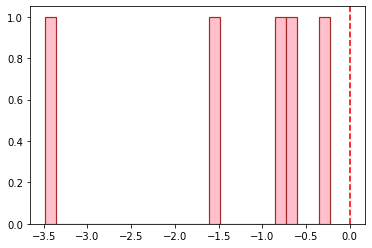

In [31]:
import matplotlib.pyplot as plt

plt.hist(r1['diff'], bins=26, color="pink", edgecolor='brown', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [32]:
pd.DataFrame({'Count': [(r1['diff']<0).sum(), (r1['diff']==0).sum(),
                        (r1['diff']>0).sum()]}, columns=['Count'],
             index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,5
Zero,0
Larger,0
